# PA 4: Association Analysis - Apriori Algorithm

## Student Details

Student Name and ID: Rucha Gurav 1001773732                     <-------only this student will upload the assignment


Team member name and ID: Gurpreet singh 1001774414

NO REPORT REQUIRED


## Submission Instructions


Step 1: Create a folder and name it 'lastname_firstname_yourNetID_PA4'

Step 2: Rename this submission file as 'lastname_firstname_yourNetID_PA4.ipynb' and place it inside the folder 'lastname_firstname_yourNetID_PA4'

Step 3: Rename the updated dataset file 'dataset.csv' and place it inside the folder 'lastname_firstname_yourNetID_PA4'  

Step 4: Your submission folder should include ONLY the following files:
    * lastname_firstname_yourNetID_PA4.ipynb, 
    * dataset.csv,
    * fruits.csv
    * Apriori algorithm


Step 5: Zip this folder and submit it on BB. Your final submission folder name should be 'lastname_firstname_yourNetID_PA4.ZIP'


## Programming Assignment Details

Before you start:
- Be familiar with the dataset.
- If you use external sources make sure that you cite them, and be specific! 
- Make sure that your code is running before you upload your submission file. TA will not debug your code.
- Start early!


For this assignment, you will have to use:
* Jupyter notebook, 
* the 'Groceries' dataset [01],
* and the Apriori Algorithm [02] (You can use the algorithm provided as reference)

## - - - - - - - - - - - - - - - - - - - - - - - SOLUTION - - - - - - - - - - - - - - - - - - - - - - -

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# Import your Libraries
import numpy as np
import pandas as pd
from apyori import apriori

### Task 1: DataSet Preprocess
Before you start you need to modify your dataset 'Groceries_dataset.csv' to look like the fruits.csv.  Each transaction is at one line with a variable length.  Discard the date attribute from your dataset.  

Export your modified dataset in a file named 'dataset.csv'.

Use pandas to Read and Print the first 7 transactions of the 'dataset.csv'.


ScreenShot of the fruits.csv


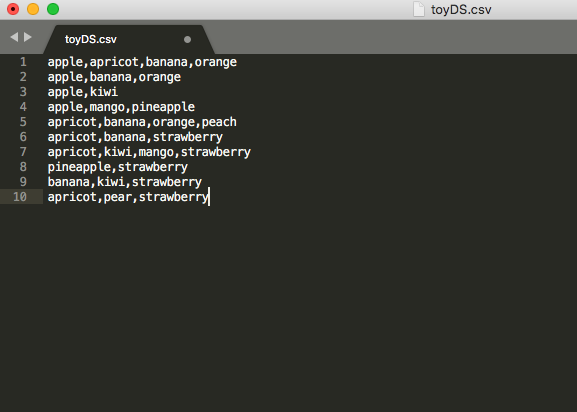

In [3]:
from IPython.display import Image
print ('ScreenShot of the fruits.csv')
Image("SampleScreen01.png")

In [4]:
# # # # # # # # #  Code for Task 1 # # # # # # # # #
df = pd.read_csv('Groceries_dataset.csv')
df.head()
df["Year"] = df["Date"].str.split("-").str[-1]
df["Months_Year"] = df["Date"].str.split("-").str[1] + "-" + df["Date"].str.split("-").str[-1] 
df.head()
df["Months_Year"].unique()
products = df["itemDescription"].unique()

one_hot = pd.get_dummies(df['itemDescription'])
df.drop(['itemDescription'], inplace=True, axis=1)
df = df.join(one_hot)
records = df.groupby(["Member_number","Date"])[products[:]].sum()
records = records.reset_index()[products]

def get_product_names(x):
    for product in products:
        if x[product] != 0:
            x[product] = product
    return x

records = records.apply(get_product_names, axis=1)

print(f"Total transactions: {len(records)}")

x = records.values
x = [sub[~(sub == 0)].tolist() for sub in x if sub[sub != 0].tolist()]
transactions = x

Total transactions: 14963


In [5]:
# # #  Solution  # # #

#Exporting the modified dataset in a file named 'dataset.csv'.
df=pd.DataFrame(transactions)
df.to_csv('dataset.csv',index=None,header=None)
#Using pandas to Read and Print the first 7 transactions of the 'dataset.csv'
df= pd.read_csv('dataset.csv',header=None)
df.head(7)


0                   1            2                    3    4  \
0   whole milk              yogurt      sausage  semi-finished bread  NaN   
1   whole milk              pastry  salty snack                  NaN  NaN   
2  canned beer     misc. beverages          NaN                  NaN  NaN   
3      sausage    hygiene articles          NaN                  NaN  NaN   
4         soda  pickled vegetables          NaN                  NaN  NaN   
5  frankfurter                curd          NaN                  NaN  NaN   
6   whole milk          rolls/buns      sausage                  NaN  NaN   

     5    6    7    8    9  
0  NaN  NaN  NaN  NaN  NaN  
1  NaN  NaN  NaN  NaN  NaN  
2  NaN  NaN  NaN  NaN  NaN  
3  NaN  NaN  NaN  NaN  NaN  
4  NaN  NaN  NaN  NaN  NaN  
5  NaN  NaN  NaN  NaN  NaN  
6  NaN  NaN  NaN  NaN  NaN

### Task 2: Implement apriory algorithm and Evaluate Results 

In this task, you have to find how you will be able to execute and print apriory results.
(*) For those that are not familiar with python and coding this could be a quite demanding task.


You will have to execute apriori algorithm "3" times for different combinations of support and confidence.
Print the results of apriory for 'dataset.csv'. 

Do not forget to add your reasoning (explain the result outcome) at the top of each case in a nice and readable way. 

You are allowed to use the python print method to print your results. DO NOT add your reasoning as comments. 


In [6]:
print ('# # # # # # # # #  Code for Task 2, Case:1 # # # # # # # # #') 
print ('Case 1 (minimum support=0.00030 and minimum confidence=0.02)') 
print ('Case 1 Reasoning:')

print ('\nHaving too low numbers in both support and confidence can be highly time consuming while running the program.'+ 
       ' Therefore, we used minimum support=0.00030 and minimum confidence=0.02 since this number is not too small. As a result of executing the program,'+ 
       ' 35 itemDescriptions were printed including there Rules with support averaging 0.000334 .'+
       ' Lets consider the Rule(frozen fish  -> specialty) this indicates that this rule will appear 0.0334% of 14963 transactions. Which is okay,'+
       ' that means we need to stock or de-stock based on this rule. However, if we think as an owner of a supermarket,'+
       ' we need to see which rules gets us the higher percentage so we can improve our sales on those items as well by getting them more\n')

print ('Case 1 Output:') 
reco = []
for i in range(0,14963 ):
    reco.append([str(df.values[i,j]) for j in range(10)])
    
for i, j in enumerate(reco):
    while "nan" in reco[i]:
        reco[i].remove("nan")
        
association_rules = apriori(reco,min_support=0.00030, min_confidance=0.02, min_lift=3, target="rules")
association_results = list(association_rules)
print("\n"+"The total number of association rules:"+str(len(association_results))+"\n")
for item in association_results:

    pair = item[0] 
    print(pair)
    items = [x for x in pair]
    
    print("Rule : ", items[0], " -> " + items[1])
    print("Support : ", str(item[1]))
    print("Confidence : ",str(item[2][0][2]))
    print("Lift : ", str(item[2][0][3]))
    
    print("=====================================")

# # # # # # # # #  Code for Task 2, Case:1 # # # # # # # # #
Case 1 (minimum support=0.00030 and minimum confidence=0.02)
Case 1 Reasoning:

Having too low numbers in both support and confidence can be highly time consuming while running the program. Therefore, we used minimum support=0.00030 and minimum confidence=0.02 since this number is not too small. As a result of executing the program, 35 itemDescriptions were printed including there Rules with support averaging 0.000334 . Lets consider the Rule(frozen fish  -> specialty) this indicates that this rule will appear 0.0334% of 14963 transactions. Which is okay, that means we need to stock or de-stock based on this rule. However, if we think as an owner of a supermarket, we need to see which rules gets us the higher percentage so we can improve our sales on those items as well by getting them more

Case 1 Output:

The total number of association rules:35

frozenset({'frozen fish', 'specialty chocolate'})
Rule :  frozen fish  -> spec

In [7]:
print ('# # # # # # # # #  Code for Task 2, Case:2 # # # # # # # # #') 
print ('Case 2 (minimum support=0.00045 and minimum confidence=0.05)') 
print ('Case 2 Reasoning:')

print ('\nIn the second case, we increase the support to 0.00045 and the confidence to 0.05.'+
       ' The results are lesser then the previous case. If we observe all the item sets, most of the'+
       ' items are having the support between 0.0004 and 0.0005. There one noticeable item that have the support greater'+
       ' than 0.0005 at the Rule pickled vegetables->ham . Let us say we feed 0.0005 as the minimum support'+
       ' to the program, then only pickled vegetables->ham set will be printed and  they are 2-itemset and rules will be'+
       ' generated. Therefore, we like to keep this support number for the second case.\n')


print ('Case 2 Output:') 
reco = []
for i in range(0,14963 ):
    reco.append([str(df.values[i,j]) for j in range(10)])
    
for i, j in enumerate(reco):
    while "nan" in reco[i]:
        reco[i].remove("nan")
        
association_rules = apriori(reco,min_support=0.0004, min_confidance=0.50, min_lift=3, target="rules")
association_results = list(association_rules)
print("\n"+"The total number of association rules:"+str(len(association_results))+"\n")
for item in association_results:

    pair = item[0] 
    print(pair)
    items = [x for x in pair]
    
    print("Rule : ", items[0], " -> " + items[1])
    print("Support : ", str(item[1]))
    print("Confidence : ",str(item[2][0][2]))
    print("Lift : ", str(item[2][0][3]))
    
    print("=====================================")

# # # # # # # # #  Code for Task 2, Case:2 # # # # # # # # #
Case 2 (minimum support=0.00045 and minimum confidence=0.05)
Case 2 Reasoning:

In the second case, we increase the support to 0.00045 and the confidence to 0.05. The results are lesser then the previous case. If we observe all the item sets, most of the items are having the support between 0.0004 and 0.0005. There one noticeable item that have the support greater than 0.0005 at the Rule pickled vegetables->ham . Let us say we feed 0.0005 as the minimum support to the program, then only pickled vegetables->ham set will be printed and  they are 2-itemset and rules will be generated. Therefore, we like to keep this support number for the second case.

Case 2 Output:

The total number of association rules:10

frozenset({'fruit/vegetable juice', 'liver loaf'})
Rule :  fruit/vegetable juice  -> liver loaf
Support :  0.00040098910646260775
Confidence :  0.011787819253438114
Lift :  3.52762278978389
frozenset({'ham', 'pickled vegeta

In [8]:
print ('# # # # # # # # #  Code for Task 2, Case:3 # # # # # # # # #') 
print ('Case 3 (minimum support=0.00025 and minimum confidence=0.03)')
print ('Case 3 Reasoning:')

print ('\nFor the final case, we are now going to decrease the support to 0.00025 and we also decrease'+
       ' the confidence number to 0.03. This can be simply explained if we look back at the results of case two. All'+
       ' the generated rules have a confidence range between 0.004 to 0.03. Also, having a higher confidence number is always'+
       ' better. For example, there is a rule stated that (“ frozen potato products  -> meat”) with a confidence number of 0.055.'+
       ' That means given 1000 customers that have waffles in their shopping carts; and 55 of those 1000 customers will likely'+
       ' have meat in their shopping carts. Therefore, using the generated rules, we can place which items'+
       ' are easily bought together on the same or nearby shelves; and stock more of those frequent items and less of those not so frequent items into our warehouse. This will definitely'+
       ' help increasing the sales and the profits.\n')

print ('Case 3 Output:')
reco = []
for i in range(0,14963 ):
    reco.append([str(df.values[i,j]) for j in range(10)])
    
for i, j in enumerate(reco):
    while "nan" in reco[i]:
        reco[i].remove("nan")
        
association_rules = apriori(reco,min_support=0.00025, min_confidance=0.03, min_lift=3, target="rules")
association_results = list(association_rules)
print("\n"+"The total number of association rules:"+str(len(association_results))+"\n")
for item in association_results:

    pair = item[0] 
    print(pair)
    items = [x for x in pair]
    
    print("Rule : ", items[0], " -> " + items[1])
    print("Support : ", str(item[1]))
    print("Confidence : ",str(item[2][0][2]))
    print("Lift : ", str(item[2][0][3]))
    
    print("=====================================")

# # # # # # # # #  Code for Task 2, Case:3 # # # # # # # # #
Case 3 (minimum support=0.00025 and minimum confidence=0.03)
Case 3 Reasoning:

For the final case, we are now going to decrease the support to 0.00025 and we also decrease the confidence number to 0.03. This can be simply explained if we look back at the results of case two. All the generated rules have a confidence range between 0.004 to 0.03. Also, having a higher confidence number is always better. For example, there is a rule stated that (“ frozen potato products  -> meat”) with a confidence number of 0.055. That means given 1000 customers that have waffles in their shopping carts; and 55 of those 1000 customers will likely have meat in their shopping carts. Therefore, using the generated rules, we can place which items are easily bought together on the same or nearby shelves; and stock more of those frequent items and less of those not so frequent items into our warehouse. This will definitely help increasing the sales 

# References

[01] https://www.kaggle.com/heeraldedhia/groceries-dataset

[02] https://github.com/asaini/Apriori


# Rubric
* [02 points] - Student Details 
* [08 points] - Comply with submission instructions 
* [30 points] - DataSet Preprocess 
* [30 points] - Run apriori algorithm
* [30 points] - Evaluate Results 
